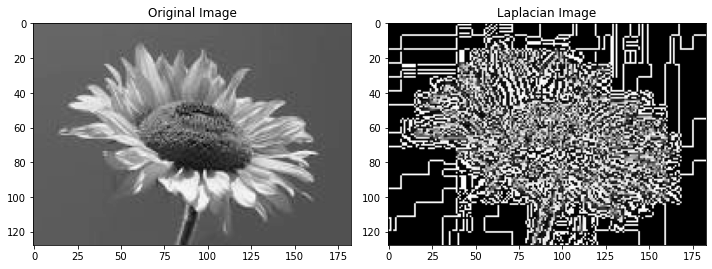

In [14]:
import numpy as np
from scipy.ndimage import convolve
import matplotlib.pyplot as plt
from PIL import Image

# Load input image
input_image = Image.open('download.jpeg').convert('L')  # Convert to grayscale if necessary
input_array = np.array(input_image)

# Define Laplacian kernel - It defines a Laplacian kernel, which is a 3x3 matrix. 
# The Laplacian operator is commonly used for edge detection in image processing.
laplacian_kernel = np.array([[0, 1, 0],
                             [1, -4, 1],
                             [0, 1, 0]])

# Perform Laplacian filtering- This function convolves the input image with the Laplacian kernel, 
# resulting in an output image that enhances edges and details.
laplacian_image = convolve(input_array, laplacian_kernel)

# Plot the original and Laplacian-filtered images
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(input_array, cmap='gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(laplacian_image, cmap='gray')
plt.title('Laplacian Image')
# It adjusts the layout of the plot using plt.tight_layout() to prevent overlapping of the images and titles.
plt.tight_layout()
plt.show()


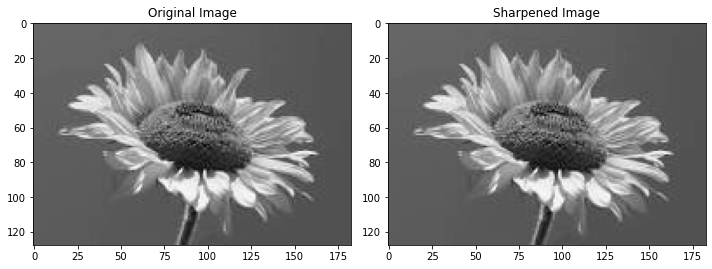

In [12]:
import numpy as np
from scipy.ndimage import convolve
import matplotlib.pyplot as plt
from PIL import Image

# Load input image
input_image = Image.open('download.jpeg').convert('L')  # Convert to grayscale if necessary
input_array = np.array(input_image)

# Define Laplacian kernel
laplacian_kernel = np.array([[0, 1, 0],
                             [1, -4, 1],
                             [0, 1, 0]])

# Perform Laplacian filtering
laplacian_image = convolve(input_array, laplacian_kernel)

# Define the sharpening factor
sharpening_factor = 0.0001

# Add a scaled version of the Laplacian image back to the original image for sharpening
sharpened_image = input_array + sharpening_factor * laplacian_image

# Clip the pixel values to the valid range [0, 255]
sharpened_image = np.clip(sharpened_image, 0, 255)

# Plot the original image and the sharpened image
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(input_array, cmap='gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')

plt.tight_layout()
plt.show()


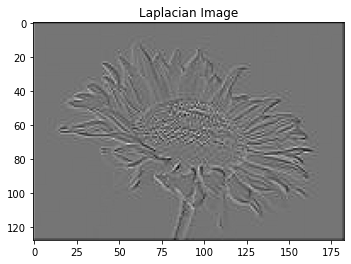

In [49]:
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import laplacian
from PIL import Image
import matplotlib.pyplot as plt

# Load input image
input_image = Image.open('download.jpeg').convert('L')  # Convert to grayscale if necessary
input_array = np.array(input_image)

# Compute dimensions of the image
height, width = input_array.shape

# Define the Laplacian matrix
diagonal = np.ones(height * width)
offsets = [-width, -1, 0, 1, width]  # Offsets for 5-point stencil Laplacian
laplacian_entries = []
laplacian_row_indices = []
laplacian_col_indices = []

for i in range(height):
    for j in range(width):
        idx = i * width + j
        laplacian_entries.append(-4)
        laplacian_row_indices.append(idx)
        laplacian_col_indices.append(idx)
        for offset in offsets:
            if 0 <= i + offset // width < height and 0 <= j + offset % width < width:
                laplacian_entries.append(1)
                laplacian_row_indices.append(idx)
                laplacian_col_indices.append((i + offset // width) * width + (j + offset % width))

laplacian_matrix = csr_matrix((laplacian_entries, (laplacian_row_indices, laplacian_col_indices)), shape=(height * width, height * width))

# Compute the Laplacian matrix of the image
laplacian_image = laplacian_matrix.dot(input_array.flatten()).reshape(input_array.shape)

# Display the Laplacian image
plt.imshow(laplacian_image, cmap='gray')
plt.title('Laplacian Image')
plt.show()


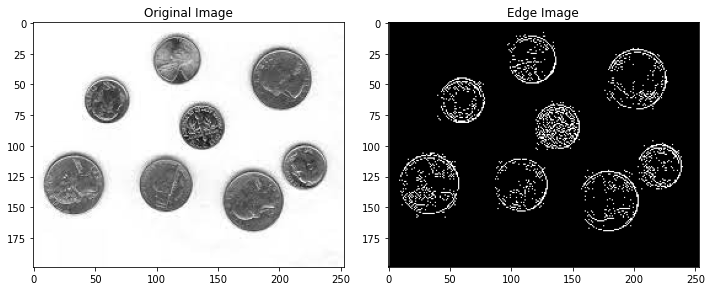

In [24]:
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import laplacian
from PIL import Image
import matplotlib.pyplot as plt

# Load input image
input_image = Image.open('tr3.jpeg').convert('L')  # Convert to grayscale if necessary
input_array = np.array(input_image)

# Compute dimensions of the image
height, width = input_array.shape

# Define the Laplacian matrix
diagonal = np.ones(height * width)
offsets = [-width, -1, 0, 1, width]  # Offsets for 5-point stencil Laplacian
laplacian_entries = []
laplacian_row_indices = []
laplacian_col_indices = []

for i in range(height):
    for j in range(width):
        idx = i * width + j
        laplacian_entries.append(-4)
        laplacian_row_indices.append(idx)
        laplacian_col_indices.append(idx)
        for offset in offsets:
            if 0 <= i + offset // width < height and 0 <= j + offset % width < width:
                laplacian_entries.append(1)
                laplacian_row_indices.append(idx)
                laplacian_col_indices.append((i + offset // width) * width + (j + offset % width))

laplacian_matrix = csr_matrix((laplacian_entries, (laplacian_row_indices, laplacian_col_indices)), shape=(height * width, height * width))

# Compute the Laplacian matrix of the image
laplacian_image = laplacian_matrix.dot(input_array.flatten()).reshape(input_array.shape)

# Apply threshold to the Laplacian image to convert it into a binary edge image
threshold = 50
edges = np.where(laplacian_image > threshold, 255, 0)

# Display the edge image
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(input_array, cmap='gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.title('Edge Image')
# It adjusts the layout of the plot using plt.tight_layout() to prevent overlapping of the images and titles.
plt.tight_layout()
plt.show()

In [50]:
laplacian_matrix.shape

(23424, 23424)

2023-06-28 21:47:32,125:[WARNING](pygsp.graphs.graph.lmax): The largest eigenvalue G.lmax is not available, we need to estimate it. Explicitly call G.estimate_lmax() or G.compute_fourier_basis() once beforehand to suppress the warning.


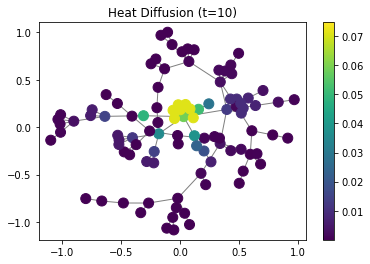

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pygsp as pg

# Create a random graph
N = 100  # Number of nodes
G = pg.graphs.BarabasiAlbert(N)

G.set_coordinates('spring')

# Define initial heat distribution
initial_heat = np.zeros(N)
initial_heat[0] = 1  # Set the first node as the heat source

# Compute the heat diffusion on the graph
diffusion_time = 10
heat_filter = pg.filters.Heat(G, tau=diffusion_time)
heat_diffusion = heat_filter.filter(initial_heat)

# Plot the heat diffusion
fig, ax = plt.subplots()
G.plot_signal(heat_diffusion, ax=ax)
ax.set_title(f"Heat Diffusion (t={diffusion_time})")
plt.show()


2023-06-29 00:17:43,112:[WARNING](pygsp.graphs.graph._check_fourier_properties): The Fourier basis G.U is not available, we need to compute the Fourier basis. Explicitly call G.compute_fourier_basis() once beforehand to suppress the warning.


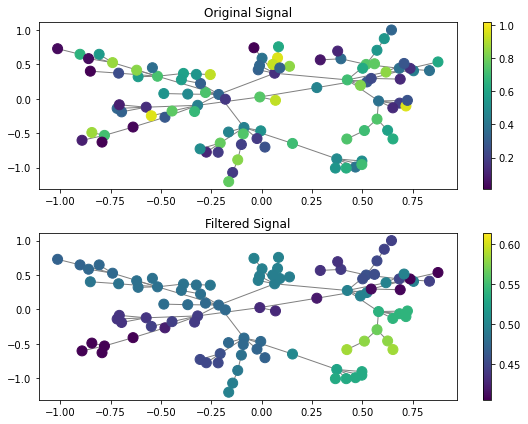

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pygsp as pg

# Generate a random graph
N = 100  # Number of nodes
G = pg.graphs.BarabasiAlbert(N)
G.set_coordinates()

# Generate a random signal on the graph
signal = np.random.rand(N)

# Perform the Graph Fourier Transform (GFT)
gft_signal = G.gft(signal)

# Define a lowpass filter in the frequency domain
cutoff = 0.1  # Cutoff frequency
filter = np.exp(-G.e ** 2 / (2 * cutoff ** 2))

# Apply the lowpass filter in the frequency domain
filtered_gft_signal = gft_signal * filter

# Perform the inverse Graph Fourier Transform (iGFT)
filtered_signal = G.igft(filtered_gft_signal)

# Plot the original and filtered signals
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
G.plot_signal(signal, ax=ax[0])
ax[0].set_title('Original Signal')
G.plot_signal(filtered_signal, ax=ax[1])
ax[1].set_title('Filtered Signal')
plt.tight_layout()
plt.show()
